# Stroke Prediction with Gaussian Naive Bayes Classifier

### Developed by:
> Cicilia Widhi Astuti
>> 20/456362/TK/50492

> Hafizha Ulinnuha Ahmad 
>> 20/456365/TK/50495

> Michael Hamonangan Sitorus 
>>20/460552/TK/51141

> Azzahra Adine Divania 
>>20/463595/TK/51587

## Importing libraries/dependencies

In [454]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import math 
import random 
import csv

## Explanatory Data Analysis and Data Preprocessing

In [455]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [456]:
data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Class Distribution - Pie Plot

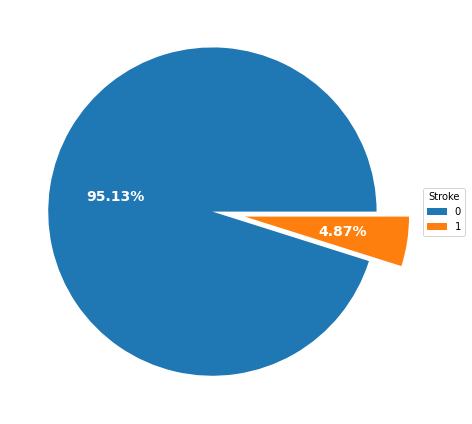

In [457]:
pie_data = data['stroke'].value_counts(normalize=True).values * 100
pie_label = data['stroke'].value_counts(normalize=True).index

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, startangle=0, explode=[0, 0.2],
                                  autopct='%.2f%%', textprops={'color':'w', 'fontsize':14, 'weight':'bold'})

ax.legend(wedges, pie_label,
          title='Stroke',
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

The class distribution seems imbalanced. We will do oversampling technique to size up the positive stroke records.

### Resolve Unbalanced Data Using Oversampling Technique

In [458]:
# Count stroke class
stroke_count_0, stroke_count_1 = data['stroke'].value_counts()

# Separate stroke class
stroke_0 = data[data['stroke'] == 0]
stroke_1 = data[data['stroke'] == 1]
print('stroke 0:', stroke_0.shape)
print('stroke 1:', stroke_1.shape)

stroke 0: (4861, 11)
stroke 1: (249, 11)


total class of 1 and 0: 1    4861
0    4861
Name: stroke, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

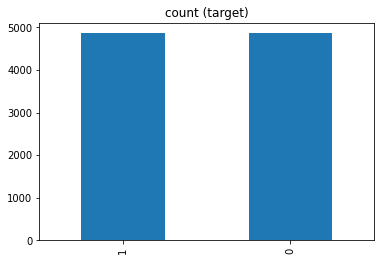

In [459]:
# Random Over-Sampling
stroke_1_over = stroke_1.sample(stroke_count_0, replace=True)

test_over = pd.concat([stroke_1_over, stroke_0], axis=0)
data = test_over

print("total class of 1 and 0:", data['stroke'].value_counts())
data['stroke'].value_counts().plot(kind='bar', title='count (target)')

### Data Cleaning

In [460]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  922
smoking_status         0
stroke                 0
dtype: int64

From the data above we can see there are around 900 null data in BMI attribute

<AxesSubplot:xlabel='bmi'>

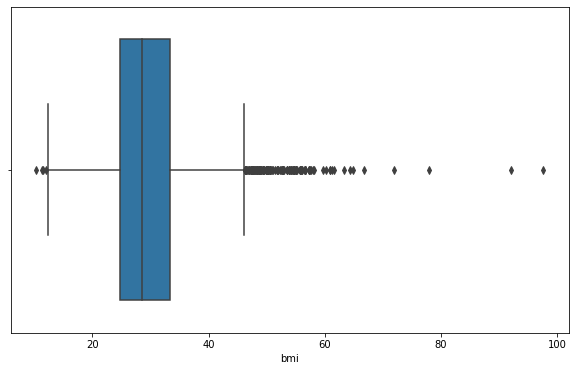

In [461]:
fig = plt.subplots(figsize=(10, 6))
sns.boxplot(data=data, x='bmi')

From the box plot above, because the dataset used is less symmetrical so it has several data that is categorized as outliers, where outliers can affect the mean value. Hence, null values ​​are more suitable to be replaced with the median value.

In [462]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Multivariate Analysis

#### Bar Plot for Categorical Data

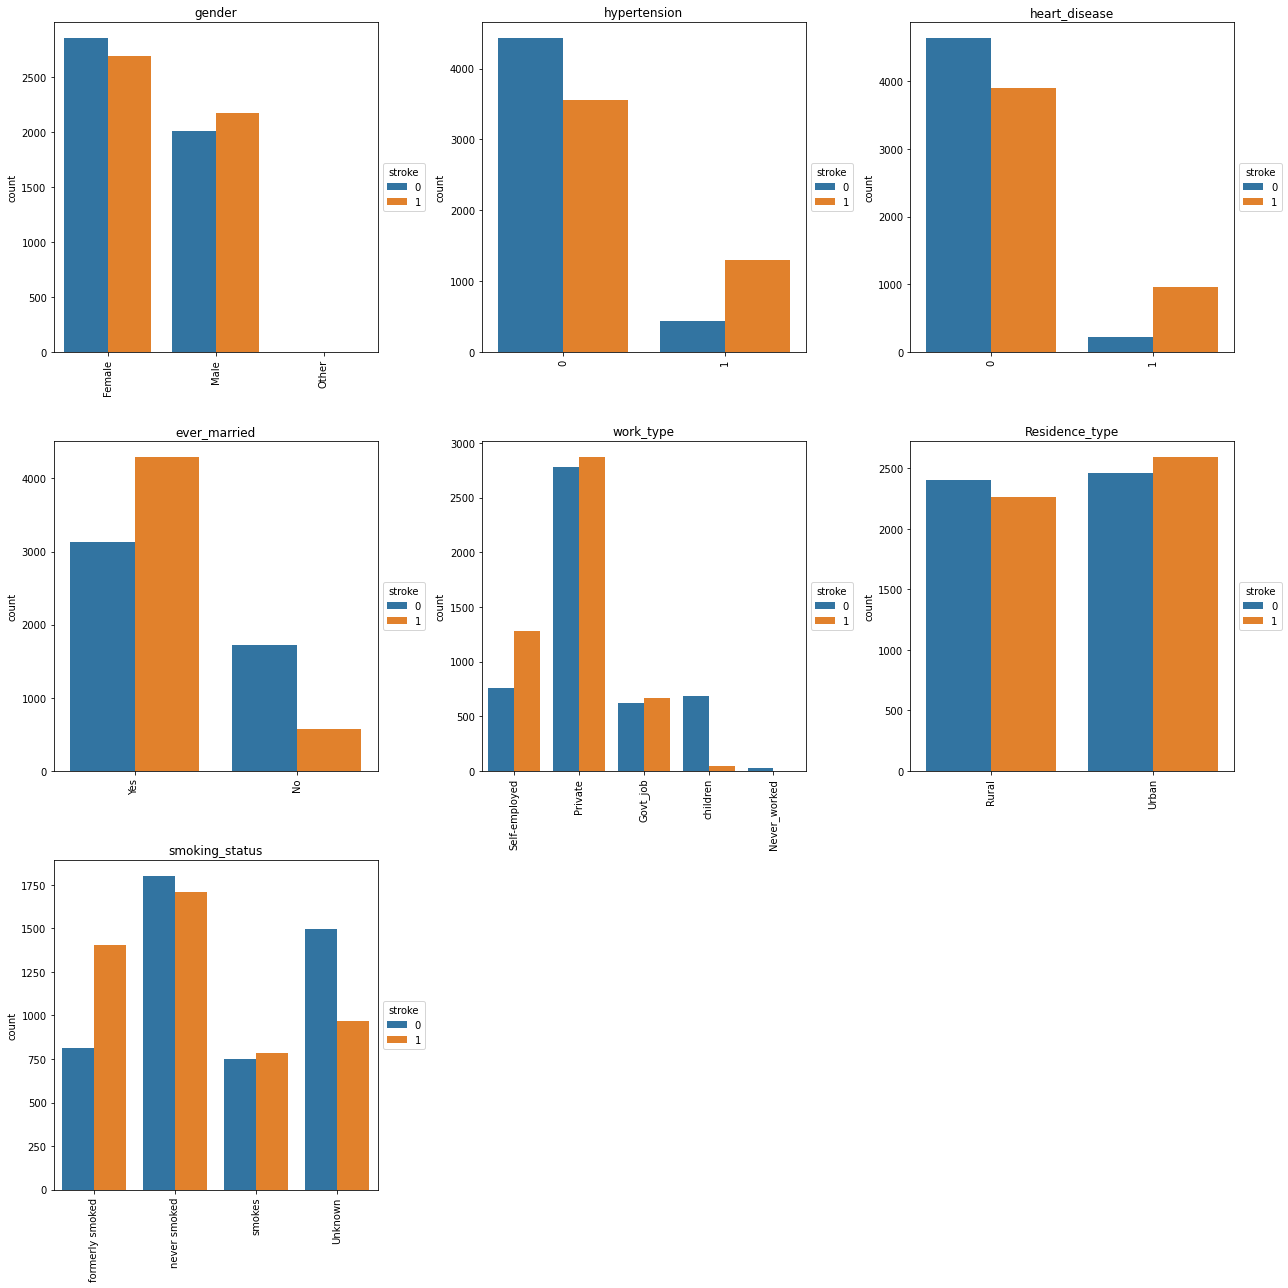

In [463]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'Residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=data, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  
axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()


#### Box Plot for Numerical Data

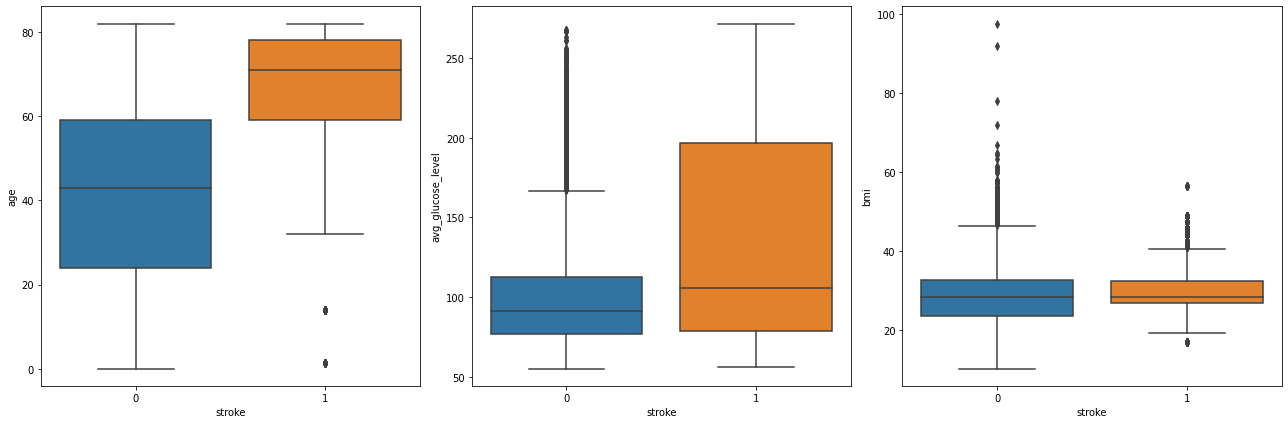

In [464]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.boxplot(data=data, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()


#### Heatmap Correlation

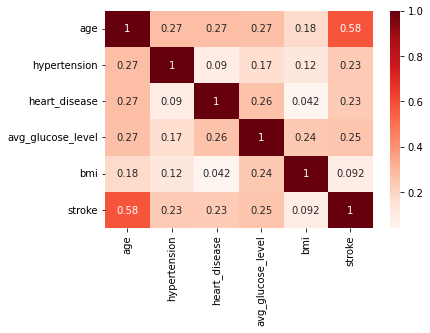

In [465]:
sns.heatmap(data.corr(), annot=True, cmap = 'Reds')
plt.show()

### Choosing Attributes of Interest

From the multivariate analysis, we will be narrowing the attributes of interest into five attributes:
- Age,
- Hypertension,
- Heart Disease,
- Average Glucose Level, and
- Body Mass Index (BMI)

In [466]:
aoi = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
data = data[aoi]
data.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
246,75.0,0,0,78.80,29.3,1
90,79.0,0,1,226.98,29.8,1
238,51.0,1,0,88.20,28.4,1
147,78.0,0,0,67.29,24.6,1
192,59.0,0,0,118.03,35.5,1
247,71.0,1,0,87.80,28.5,1
149,70.0,0,1,239.07,26.1,1
72,66.0,1,0,116.55,31.1,1
41,54.0,0,0,71.22,28.5,1
39,49.0,0,0,60.91,29.9,1


In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 246 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9722 non-null   float64
 1   hypertension       9722 non-null   int64  
 2   heart_disease      9722 non-null   int64  
 3   avg_glucose_level  9722 non-null   float64
 4   bmi                9722 non-null   float64
 5   stroke             9722 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 531.7 KB


In [468]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

data[column_numerical].describe()

,age,avg_glucose_level,bmi
count,9722.000000,9722.000000,9722.000000
mean,54.748829,118.610299,29.442214
std,22.172846,55.352940,6.851249
min,0.080000,55.120000,10.300000
25%,41.000000,78.180000,25.400000
50%,59.000000,96.830000,28.500000
75%,74.000000,145.120000,32.600000
max,82.000000,271.740000,97.600000


### Exporting the preprocessed dataset

In [469]:
data.to_csv('preprocessed_stroke_data.csv', index=False)

## Modelling : Gaussian Naive Bayes Classifier

### Data Handling

In [470]:
# Load CSV from the directory
def loadCsv(filename):
    lines = csv.reader(open(filename))
    dataset = list(lines)
    dataset.pop(0)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [471]:
# Separate dataset into training set and testing set
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

### Data Separation by Class

In [472]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if vector[-1] not in separated:
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [473]:
def summarize(dataset):
    summaries = [(np.mean(attribute), np.std(attribute, ddof=1)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [474]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

### Prediction using Gaussian PDF

In [475]:
# Formula of gaussian probability density function
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math.pi)*stdev))*exponent

In [476]:
# Calculating the class categorization probability of input vector
def calculateClassProbabilites(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

In [477]:
# Comparing the class categorization probability (highest) to pick the best prediction
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilites(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [478]:
# Organizing predictions into a list
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [479]:
# Outputing confusion matrix, accuracy, precision, recall, specificity, 
# negative prediciton value, and f1 score to analyze the final model
def getPerformanceMetrics(testSet, predictions):
    mat = np.zeros((2,2))
    for i in range(len(testSet)):
        # True Positive
        if testSet[i][-1] == predictions[i] and int(predictions[i]) == 1:
            mat[0, 0] += 1
        # True Negative
        elif testSet[i][-1] == predictions[i] and int(predictions[i]) == 0:
            mat[1, 1] += 1
        # False Positive
        elif testSet[i][-1] != predictions[i] and int(predictions[i]) == 1:
            mat[0, 1] += 1
        # False Negative
        elif testSet[i][-1] != predictions[i] and int(predictions[i]) == 0:
            mat[1, 0] += 1
    
    TP = mat[0, 0]
    TN = mat[1, 1]
    FP = mat[0, 1]
    FN = mat[1, 0]
    
    metrics = dict()
    metrics['confusion_matrix'] = mat
    metrics['accuracy'] = (TP+TN)/(TP+TN+FP+FN)
    metrics['precision'] = TP/(TP+FP)
    metrics['recall'] = TP/(TP+FN)
    metrics['specificity'] = TN/(TN+FP)
    metrics['negative_pred_value'] = TN/(FN+TN)
    metrics['f1_score'] = 2*(metrics["recall"]*metrics["precision"])/(metrics["recall"]+metrics["precision"])
    
    return metrics

In [480]:
# Load/import the preprocessed dataset
filename = 'preprocessed_stroke_data.csv'
splitRatio = 0.67
dataset = loadCsv(filename)

In [481]:
# Dividing the dataset into training dataset and testing dataset
trainingSet, testSet = splitDataset(dataset, splitRatio)
print('Split {0} rows into train = {1} and test = {2} rows'.format(len(dataset), len(trainingSet), len(testSet)))

Split 9722 rows into train = 6513 and test = 3209 rows


Performance Metrics
- Accuracy: 0.7154876908694298
- Precision: 0.780811232449298
- Recall: 0.6129822412737294
- Specificity: 0.8217005076142132
- Negative Predicted Value: 0.6720290607161391
- F1 Score: 0.6867924528301886


<AxesSubplot:>

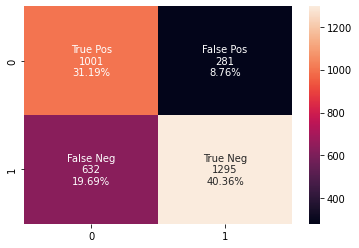

In [482]:
# Calculating summary (mean and standard deviation) for each attribute in each class
summaries = summarizeByClass(trainingSet)

# Making predictions of testing set
predictions = getPredictions(summaries, testSet)

# Constructing confusion matrix to assess performance metrics (also returning the confusion matrix itself)
perf_metrics = getPerformanceMetrics(testSet, predictions)

print("Performance Metrics")
print("- Accuracy:", perf_metrics["accuracy"])
print("- Precision:", perf_metrics["precision"])
print("- Recall:", perf_metrics['recall'])
print("- Specificity:", perf_metrics['specificity'])
print("- Negative Predicted Value:",  perf_metrics['negative_pred_value'])
print("- F1 Score:", perf_metrics['f1_score'])

# Confusion Matrix Plotting
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ['{0:0.0f}'.format(value) for value in perf_metrics['confusion_matrix'].flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in perf_metrics['confusion_matrix'].flatten()/np.sum(perf_metrics['confusion_matrix'])]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(perf_metrics['confusion_matrix'], annot=labels, fmt='')

<p align="center"><em>--- end of the notebook ---</em></p>